In [1]:
# KUC, NLP

2. LDiA

In [15]:
import pandas as pd
import numpy as np

from sklearn.decomposition import LatentDirichletAllocation

In [16]:
# original data
sms = pd.read_csv('sms-spam.csv',usecols= ['spam','text'])
print(sms.head())

   spam  \
0  0      
1  0      
2  1      
3  0      
4  0      

                                                                                                                                                          text  
0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                              
1  Ok lar... Joking wif u oni...                                                                                                                                
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3  U dun say so early hor... U c already then say...                                                                                                            
4  Nah I don't think he goes to usf, he lives around here though                                                                

In [17]:
# processed
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]  # <2>
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
mask = sms.spam.astype(bool).values
sms['spam'] = sms.spam.astype(int)

print(sms.head())

       spam  \
sms0   0      
sms1   0      
sms2!  1      
sms3   0      
sms4   0      

                                                                                                                                                              text  
sms0   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                              
sms1   Ok lar... Joking wif u oni...                                                                                                                                
sms2!  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
sms3   U dun say so early hor... U c already then say...                                                                                                            
sms4   Nah I don't think he goes to usf, he lives around here though                

In [18]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize.casual import casual_tokenize

n_samples = 4837
n_features = 1000
n_components = 10
n_top_words = 20
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(sms.text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


In [19]:
#
lda_model = LatentDirichletAllocation(n_components)
topics = lda_model.fit_transform(tfidf)

top_terms = 20
TOTAL_TOPICS = 20
vocabulary = np.array(tfidf_vectorizer.get_feature_names())
topic_terms = lda_model.components_

/Users/hure002/opt/anaconda3/envs/PGR107/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
print(topic_terms.shape)
print(topic_terms[:top_terms])

(10, 1000)
[[ 0.10000057  0.10000025  0.10001551 ...  0.10000004  0.10000182
   0.10000113]
 [ 0.10000664  2.25705733  0.1000048  ...  0.10000001  0.10000955
   0.10000367]
 [ 0.10002908  0.10000155  0.10006569 ...  0.82671281  0.10000234
  17.48101749]
 ...
 [ 0.10000001  0.10000129  0.10000837 ...  0.79830674  0.1
   0.10000001]
 [ 1.18806449  0.10000002  0.10000048 ...  0.10000074  1.02570555
   0.10000043]
 [ 2.11603441  0.10000015  0.10000455 ...  0.10000195  0.1
   0.10004071]]


In [31]:
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:, :top_terms]
topic_keyterms = vocabulary[topic_key_term_idxs]

In [32]:
print(topic_keyterms)
print(topic_keyterms[0])

[['love' 'lol' 'good' 'babe' 'day' 'ya' 'job' 'talk' 'doing' 'today'
  'hope' 'did' 'just' 'miss' 'getting' 'happy' 'hello' 'come' 'haha'
  'watching']
 ['lt' 'gt' 'sent' 'princess' 'want' 'just' 'long' 'min' 'bit' 'make'
  'minutes' 'time' 'yesterday' 'come' 'decimal' 'text' 'like' 'does'
  'huh' 'landline']
 ['ok' 'come' 'ur' 'dont' 'need' 'time' 'ask' 'tomorrow' 'yup' 'leave'
  'shall' 'lor' 'tell' 'pick' 'good' 'let' 'house' 'know' 'morning'
  'want']
 ['message' 'stop' 'way' 'txt' 'free' 'right' 'send' 'phone' 'class'
  'text' 'new' 'reply' 'www' 'mobile' 'number' 'check' 'uk' 'com' 'win'
  'pls']
 ['da' 'pls' 'oh' 'meet' 'hi' 'hey' 'thanx' 'pa' 'got' 'thank' 'chat'
  'ah' 'okie' 'god' 've' 'lunch' 'birthday' 'finished' 'didnt' 'haf']
 ['like' 'prize' 'home' 'won' 'told' 'thanks' 'claim' 'ready' 'great'
  'trying' 'guaranteed' 'ill' 'stuff' 'contact' 'feel' 'urgent' 'just'
  'easy' 'dinner' 'enjoy']
 ['yeah' 'fine' 'night' 'going' 'think' 'got' 'im' 'coming' 'money'
  'plan' 'tell

In [33]:
# topics = [', '.join(topic) for topic in topic_keyterms]

In [34]:
print(topics.shape)

(4837, 10)


In [35]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(topics)
print(topics_df.head(5))


          0         1         2         3         4         5         6  \
0  0.027740  0.027729  0.027741  0.027730  0.027778  0.750270  0.027753   
1  0.037024  0.037022  0.037040  0.037021  0.037021  0.037021  0.037023   
2  0.021889  0.021890  0.021890  0.560674  0.021889  0.021940  0.021897   
3  0.037538  0.037537  0.037543  0.037538  0.037543  0.037537  0.037551   
4  0.031279  0.718617  0.031259  0.031257  0.031258  0.031259  0.031272   

          7         8         9  
0  0.027753  0.027735  0.027770  
1  0.037021  0.037023  0.666783  
2  0.021893  0.264148  0.021890  
3  0.037540  0.037537  0.662136  
4  0.031272  0.031270  0.031259  


/var/folders/96/nzbv_1f552n35ys6t_2wlj880000gp/T/ipykernel_8092/3960428630.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [36]:
# another implementation with more visualization

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [37]:
import matplotlib.pyplot as plt
# plot_top_words, see sklearn documentation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    # plt.show()
    plt.savefig('topics.png')

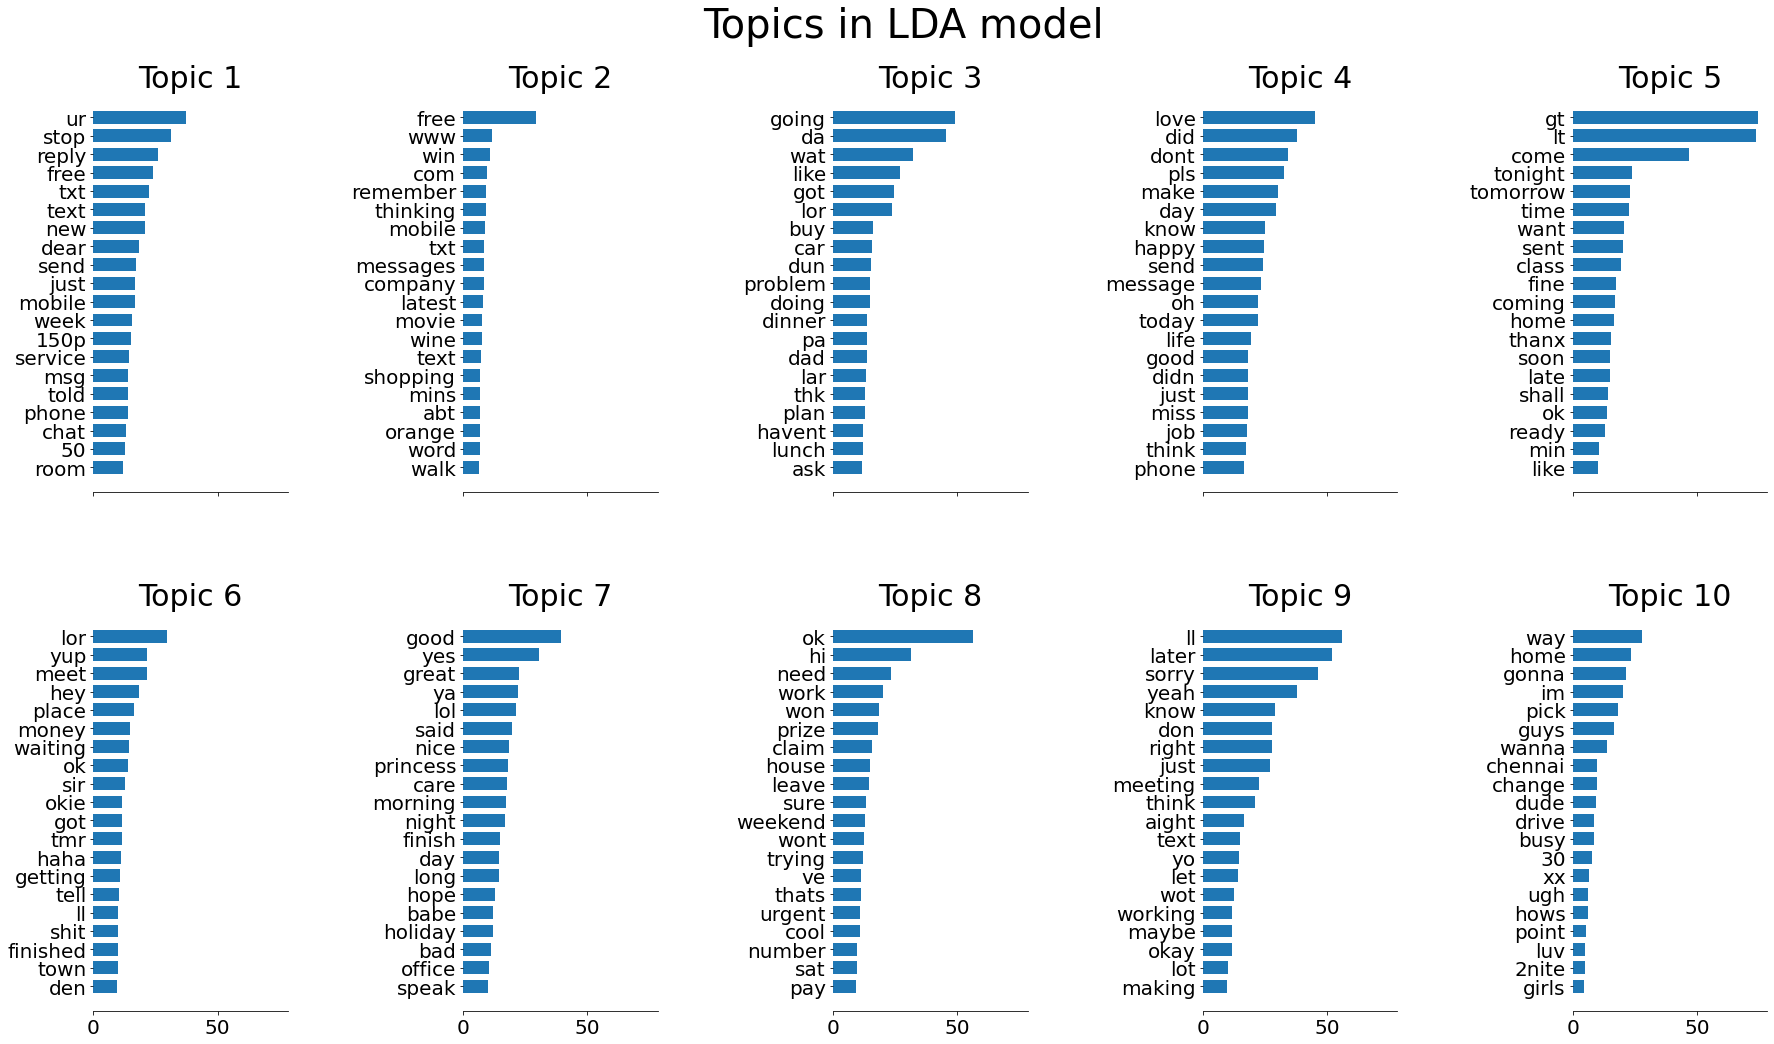

In [38]:
%matplotlib inline
plot_top_words(lda, tfidf_feature_names, n_top_words, "Topics in LDA model")